# Import Libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 

# Data Collection & Analysis

In [3]:
## Loading the dataset

df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
## Number of rows and columns

df.shape

(200, 5)

In [6]:
## Info of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
## Checking Missing Values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing Annual Income and Spending Score Column

In [8]:
x=df.iloc[:,[3,4]].values

In [9]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### 

## Choosing the number of Clusters

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Finding WCSS value for different number of Cluster
wcss=[]

for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x)
    values=model.inertia_
    wcss.append(values)

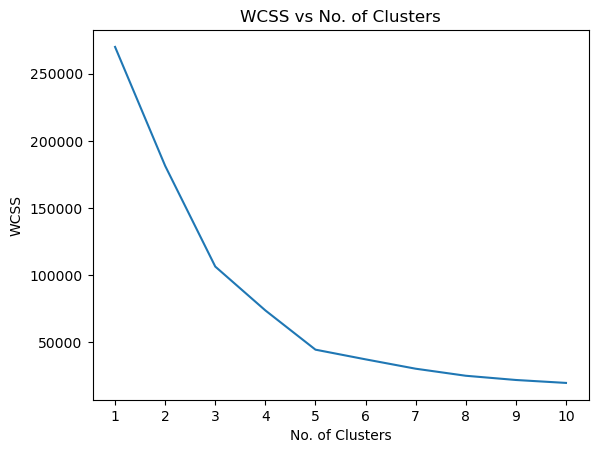

In [12]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs No. of Clusters')
plt.show()

### optimum number of Clusters = 5

### 

### Using Kneed to find optimum number of Clusters

In [13]:
from kneed import KneeLocator

In [14]:
kneed=KneeLocator(x=range(1,11),y=wcss,curve='convex',direction='decreasing')

In [15]:
print('optimum number of Clusters : ',kneed.elbow)

optimum number of Clusters :  5


### 

# Training Model

In [16]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)

## return a label for each data point based on their Cluster
y=model.fit_predict(x)

print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### 

# Visualizing Clusters and Centroids 

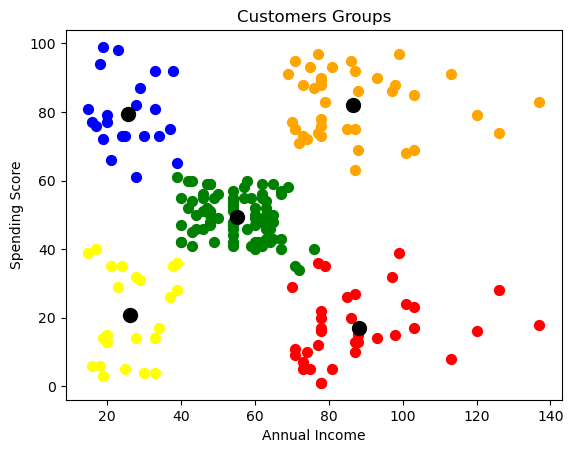

In [17]:
## Plotting Clusters
plt.scatter(x[y==0,0],x[y==0,1],c='green',s=50,label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],c='red',s=50,label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],c='yellow',s=50,label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],c='blue',s=50,label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],c='orange',s=50,label='cluster5')

## Plotting Centroids
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customers Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()